In [65]:
#######################
#Erhan Önal 150170713
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from math import sqrt


data= pd.read_csv("AAPL.csv")

In [66]:
def draw(startDate = data.iloc[0,0],endDate = data.iloc[1510,0],filtered = False) :
   
    if data[data['Date']==endDate].empty or data[data['Date']==endDate].empty :
        print("Invalid Date")
        return
    startRow=data[data['Date']==startDate].index[0]
    endRow=data[data['Date']==endDate].index[0]
    if startRow > endRow or startRow<0 or endRow>1510:
        print("Invalid Dates")
        return
    plotData= data.iloc[startRow:endRow+1,:]
   # print(plotData)
    if not filtered:
        fig=plt.figure()
        plt.title("Plot of Closing Price")
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.plot(plotData.loc[:,'Date'],plotData.loc[:,'Close'],color='r')
        print("Average: ",plotData.loc[:,'Close'].mean()," Standard Deviation: ",plotData.loc[:,'Close'].std())
    else:
        A=0
        B=0
        filteredPlotData= pd.DataFrame({"Date":[],"Close":[]}) 
       # print(range(startRow,endRow))
        for i in range(0,endRow - startRow):
            Y=(1/3)* (plotData.loc[i+startRow,'Close'] + A + B)
            filteredPlotData1= pd.DataFrame({"Date":[plotData.iloc[i,0]],"Close":[plotData.iloc[i,4]]})   
            filteredPlotData= filteredPlotData.append(filteredPlotData1)
            #print(filteredPlotData)
            B=A
            A=plotData.loc[i+startRow,'Close']
        #print(filteredPlotData)
        fig=plt.figure()
        plt.title("Plot of Filtered Closing Price")
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.plot(filteredPlotData.loc[:,'Date'],filteredPlotData.loc[:,'Close'],color='r')
        print("Average: ",filteredPlotData.loc[:,'Close'].mean()," Standard Deviation: ",filteredPlotData.loc[:,'Close'].std() )
            
        
      
        

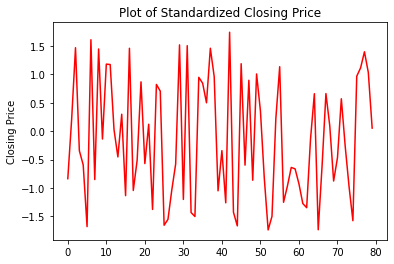

In [67]:
cut=data.iloc[1111:1511,4]
result=pd.DataFrame({"Data":[]})
for i in range(0,400,5):
    tmp=pd.DataFrame({"Data":[]})
    for j in range(5):
        one=pd.DataFrame({"Data":[cut.iloc[i+j]]})
        tmp=tmp.append(one)
    resTmp=pd.DataFrame({"Data":(tmp.iloc[0]-tmp.mean())/tmp.std()})
    result=result.append(resTmp)
#print(result)
fig=plt.figure()
plt.title("Plot of Standardized Closing Price")
#plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot([i for (i) in range(80)],result,color='r')
plt.show()

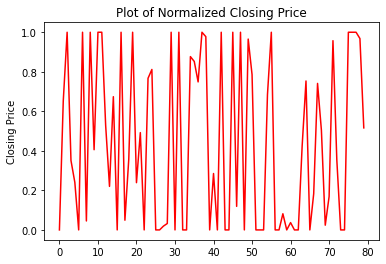

In [68]:
result=pd.DataFrame({"Data":[]})
for i in range(0,400,5):
    tmp=pd.DataFrame({"Data":[]})
    for j in range(5):
        one=pd.DataFrame({"Data":[cut.iloc[i+j]]})
        tmp=tmp.append(one)
    resTmp=pd.DataFrame({"Data":(tmp.iloc[0]-tmp.min())/(tmp.max()-tmp.min())})
    result=result.append(resTmp)
#print(result)
fig=plt.figure()
plt.title("Plot of Normalized Closing Price")
#plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot([i for (i) in range(80)],result,color='r')
plt.show()